In [16]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("lamparaGrandeRef.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("lamparaGrandeMuestra.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("lamparaGrandeDark.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


irradiancia_lampara = np.array(  (radiancia_muestra) / (radiancia_referencia))

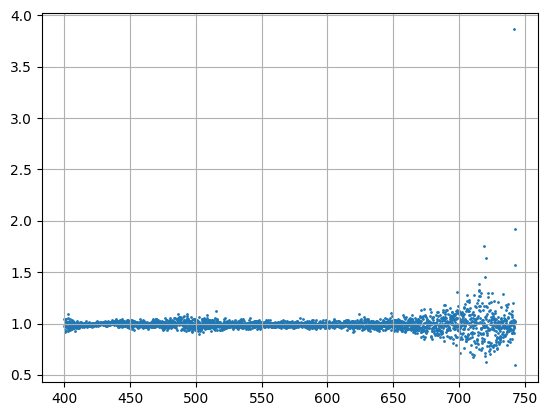

In [19]:
import matplotlib.pyplot as plt
import numpy as np
mask = longitud_onda>400

plt.scatter(longitud_onda[mask], irradiancia_lampara[mask], s=1)
plt.grid()
plt.show()

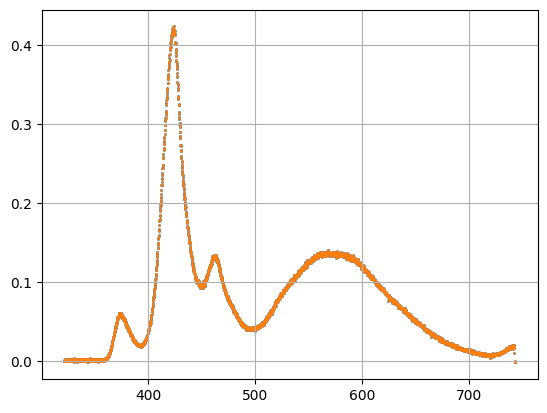

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(longitud_onda, radiancia_dark, s=1)
plt.scatter(longitud_onda, radiancia_referencia, s=.5)
plt.grid()
plt.show()

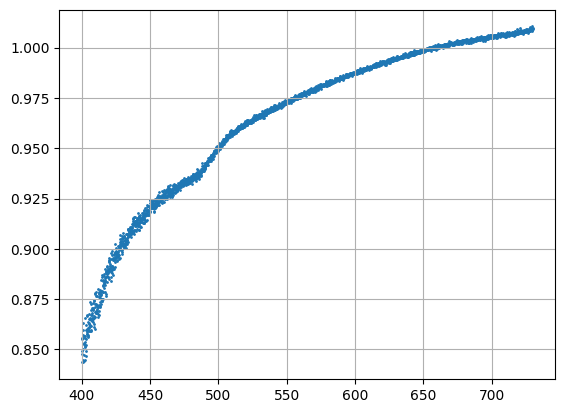

[1.66920724 1.66947324 1.66973946 ... 3.85120489 3.85249329 3.85378255]


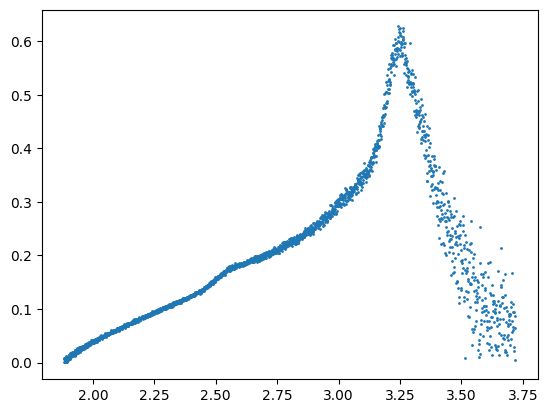

In [53]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("lampara_estandar.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("lampara_muestra.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("Dark.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


irradiancia_lampara = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>400) & (longitud_onda<730)

plt.scatter(longitud_onda[mask], irradiancia_lampara[mask], s=1)
plt.grid()
plt.show()

from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-irradiancia_lampara)**2 / (2*irradiancia_lampara)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = h*c / longitud_onda / e * 1e9
x = np.flip(x)
print(x)


y = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y, s=1 )
plt.show()

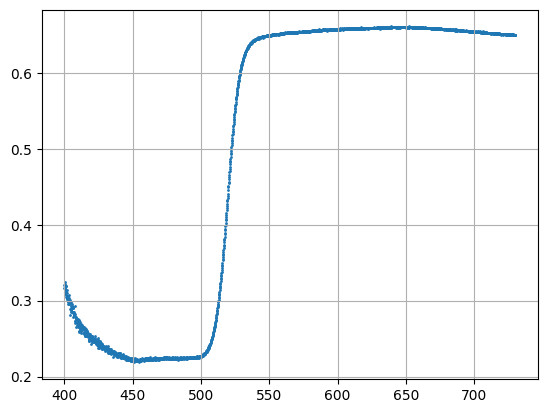

[1.66920724 1.66947324 1.66973946 ... 3.85120489 3.85249329 3.85378255]


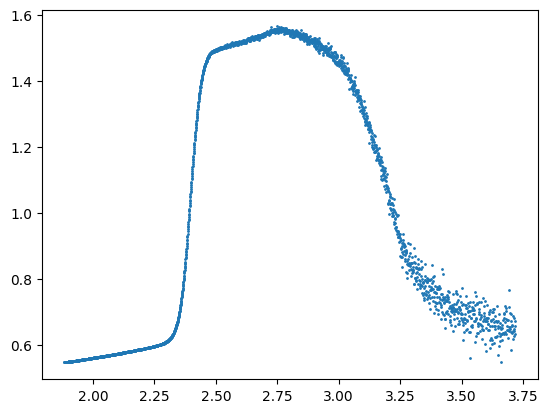

In [55]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("lampara_estandar_sin_perovskita.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("lampara_estandar_con_perovskita.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("Dark_perovskita.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


irradiancia_lampara = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>400) & (longitud_onda<730)

plt.scatter(longitud_onda[mask], irradiancia_lampara[mask], s=1)
plt.grid()
plt.show()

from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-irradiancia_lampara)**2 / (2*irradiancia_lampara)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = h*c / longitud_onda / e * 1e9
x = np.flip(x)
print(x)


y = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y, s=1 )
plt.show()